<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #F3F781;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
     Heart Attack in Youth Vs Adult in America(State) <br>
    (EDA / Machine learning)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Heart Attack in Youth Vs Adult in America(State)</div>**


## Goal
> ## EDA : Column Analysis, Column Correlation Analysis
> ## Modeling : Predicting Heart Attack

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

# For model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-in-youth-vs-adult-in-americastate/heart_attack_youth_vs_adult (1).csv')
df.head()

,ID,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Stress_Level,Family_History,Diabetes,Air_Quality_Index,Income_Level,Sleep_Hours,Heart_Rate,Medication_Status,Heart_Attack
0,1,Youth,Female,Native American,Current Smoker,Moderate,Average,219,130,24.0,149,High,1,0,Moderate,High,4.3,98,0,0
1,2,Adult,Female,Native American,Non-smoker,Moderate,Average,151,122,35.6,199,Moderate,0,1,Good,Medium,8.0,81,0,0
2,3,Adult,Male,Native American,Former Smoker,Moderate,Average,141,155,22.3,98,High,0,0,Good,Low,5.9,84,0,1
3,4,Adult,Female,Black,Non-smoker,Moderate,Average,220,173,29.8,24,High,0,1,Moderate,Low,8.5,75,0,0
4,5,Youth,Male,White,Non-smoker,Moderate,Average,233,140,30.9,78,High,0,0,Good,Medium,5.9,99,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   Age_Group            object 
 2   Gender               object 
 3   Ethnicity            object 
 4   Smoking_Status       object 
 5   Alcohol_Consumption  object 
 6   Diet_Quality         object 
 7   Cholesterol_Level    int64  
 8   Blood_Pressure       int64  
 9   BMI                  float64
 10  Physical_Activity    int64  
 11  Stress_Level         object 
 12  Family_History       int64  
 13  Diabetes             int64  
 14  Air_Quality_Index    object 
 15  Income_Level         object 
 16  Sleep_Hours          float64
 17  Heart_Rate           int64  
 18  Medication_Status    int64  
 19  Heart_Attack         int64  
dtypes: float64(2), int64(9), object(9)
memory usage: 762.9+ MB


In [4]:
df.drop('ID', axis=1, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cholesterol_Level,5000000.0,209.467784,51.953050,120.0,164.0,209.0,254.0,299.0
Blood_Pressure,5000000.0,134.506569,25.977452,90.0,112.0,135.0,157.0,179.0
BMI,5000000.0,28.999215,6.349140,18.0,23.5,29.0,34.5,40.0
Physical_Activity,5000000.0,149.559525,86.586017,0.0,75.0,150.0,225.0,299.0
Family_History,5000000.0,0.299800,0.458170,0.0,0.0,0.0,1.0,1.0
Diabetes,5000000.0,0.200198,0.400148,0.0,0.0,0.0,0.0,1.0
Sleep_Hours,5000000.0,6.999863,1.732367,4.0,5.5,7.0,8.5,10.0
Heart_Rate,5000000.0,74.508136,14.428859,50.0,62.0,75.0,87.0,99.0
Medication_Status,5000000.0,0.149880,0.356954,0.0,0.0,0.0,0.0,1.0
Heart_Attack,5000000.0,0.100056,0.300075,0.0,0.0,0.0,0.0,1.0


In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
Age_Group,5000000,2,Adult,2999540
Gender,5000000,3,Female,2400992
Ethnicity,5000000,5,Black,1001528
Smoking_Status,5000000,3,Non-smoker,3001619
Alcohol_Consumption,3001085,2,Moderate,2501560
Diet_Quality,5000000,3,Average,2497954
Stress_Level,5000000,3,Moderate,2501431
Air_Quality_Index,5000000,3,Good,2501150
Income_Level,5000000,3,Low,2001546


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Age_Group               0.0000
Gender                  0.0000
Ethnicity               0.0000
Smoking_Status          0.0000
Alcohol_Consumption    39.9783
Diet_Quality            0.0000
Cholesterol_Level       0.0000
Blood_Pressure          0.0000
BMI                     0.0000
Physical_Activity       0.0000
Stress_Level            0.0000
Family_History          0.0000
Diabetes                0.0000
Air_Quality_Index       0.0000
Income_Level            0.0000
Sleep_Hours             0.0000
Heart_Rate              0.0000
Medication_Status       0.0000
Heart_Attack            0.0000
dtype: float64

Duplicate Rows (%):
0.0


### I think that a missing value for Alcohol_Consumption means 'no alcohol consumption'.

In [7]:
df['Alcohol_Consumption'].unique()

array(['Moderate', nan, 'High'], dtype=object)

In [8]:
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna('No Alcohol Consumption')
df['Alcohol_Consumption'].unique()

array(['Moderate', 'No Alcohol Consumption', 'High'], dtype=object)

In [9]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

Missing Value (%)
Age_Group              0.0
Gender                 0.0
Ethnicity              0.0
Smoking_Status         0.0
Alcohol_Consumption    0.0
Diet_Quality           0.0
Cholesterol_Level      0.0
Blood_Pressure         0.0
BMI                    0.0
Physical_Activity      0.0
Stress_Level           0.0
Family_History         0.0
Diabetes               0.0
Air_Quality_Index      0.0
Income_Level           0.0
Sleep_Hours            0.0
Heart_Rate             0.0
Medication_Status      0.0
Heart_Attack           0.0
dtype: float64


In [10]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Stress_Level,Family_History,Diabetes,Air_Quality_Index,Income_Level,Sleep_Hours,Heart_Rate,Medication_Status,Heart_Attack
0,Adult,Female,Native American,Non-smoker,Moderate,Average,151,122,35.6,199,Moderate,0,1,Good,Medium,8.0,81,0,0
1,Adult,Female,Black,Non-smoker,Moderate,Average,220,173,29.8,24,High,0,1,Moderate,Low,8.5,75,0,0
2,Youth,Female,Native American,Non-smoker,No Alcohol Consumption,Average,138,179,32.1,216,Moderate,1,1,Good,High,7.8,84,0,0
3,Youth,Female,Black,Non-smoker,Moderate,Average,176,139,27.8,255,Low,0,1,Good,Low,9.6,89,0,0
4,Youth,Male,Hispanic,Non-smoker,Moderate,Excellent,234,168,37.9,92,Moderate,1,1,Good,Low,8.0,85,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250663,Adult,Female,White,Non-smoker,No Alcohol Consumption,Poor,203,151,29.6,25,Moderate,1,0,Moderate,Medium,9.3,51,0,1
2250664,Youth,Female,Hispanic,Non-smoker,Moderate,Average,279,124,34.3,59,High,1,0,Good,Medium,8.9,56,0,1
2250665,Youth,Female,Black,Non-smoker,Moderate,Poor,260,131,23.1,134,Low,0,0,Good,Low,6.7,52,0,1
2250666,Adult,Male,White,Non-smoker,No Alcohol Consumption,Poor,265,130,18.3,299,Moderate,0,0,Good,Medium,9.3,78,0,1


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

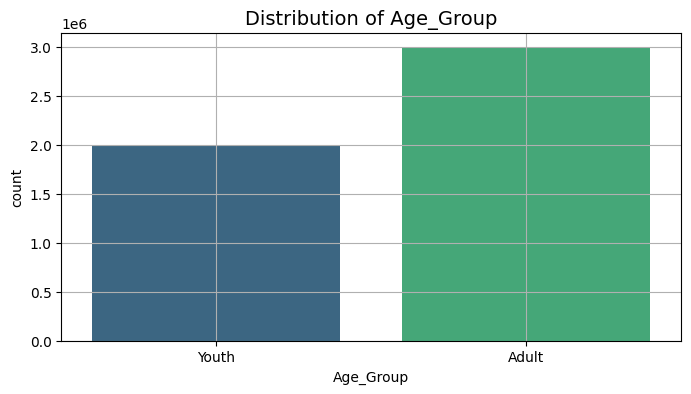

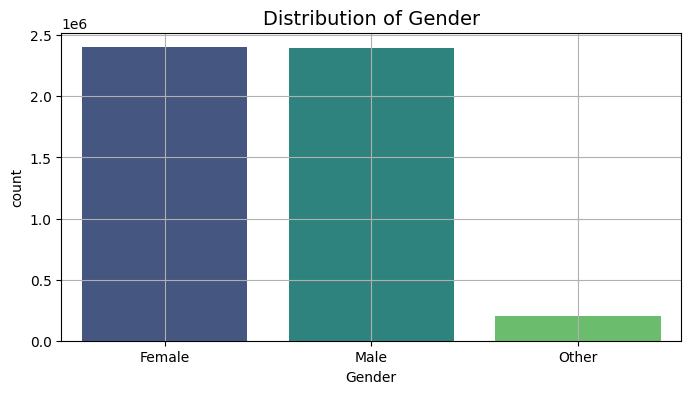

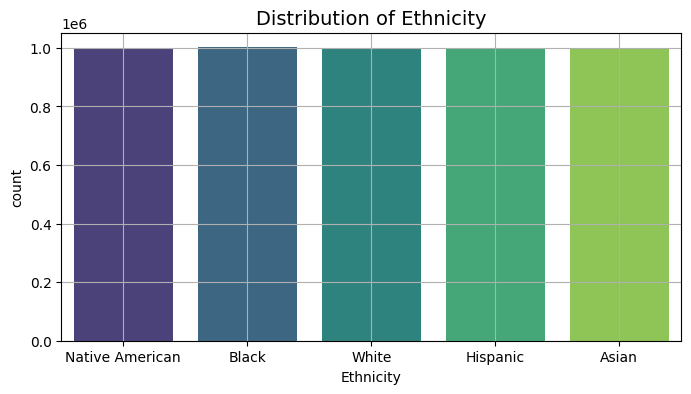

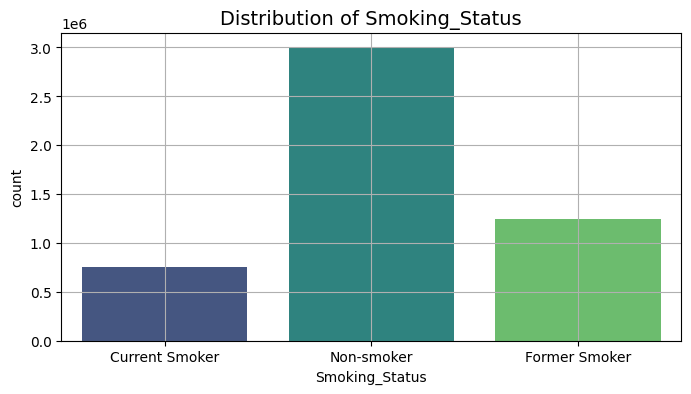

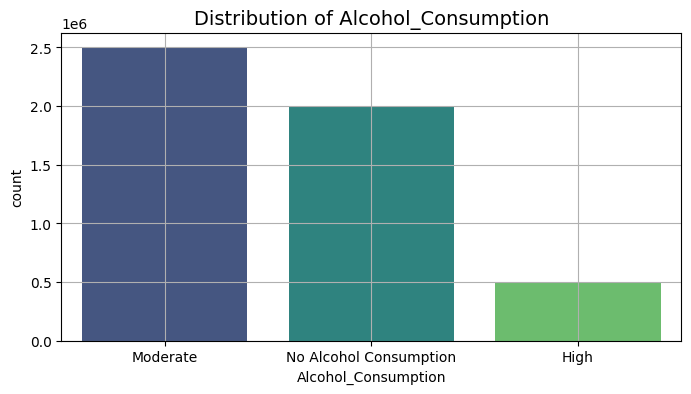

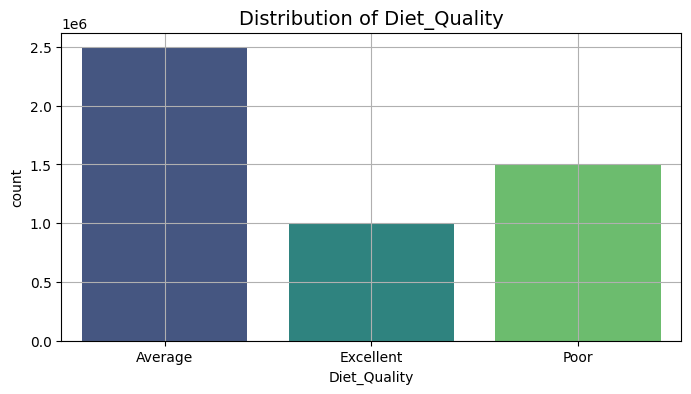

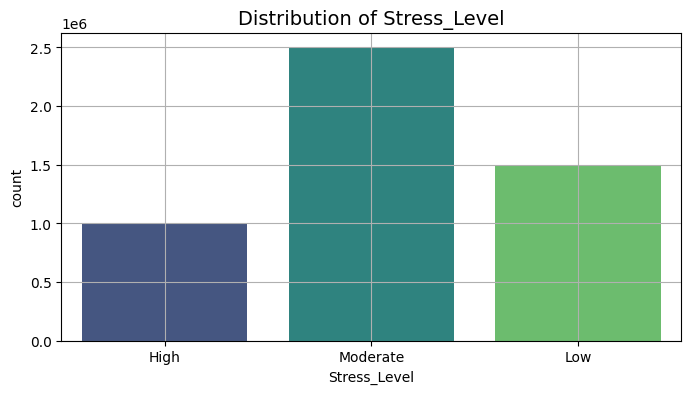

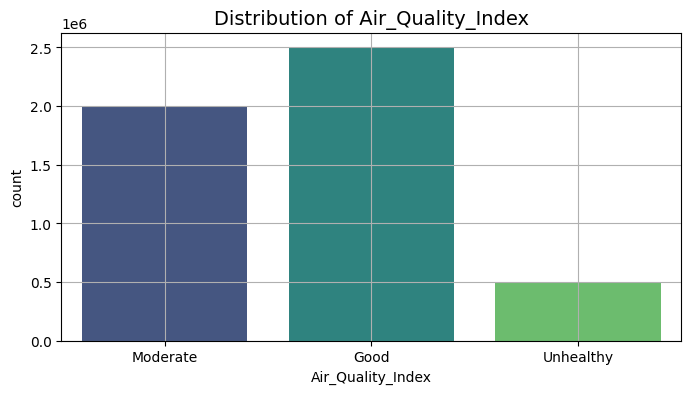

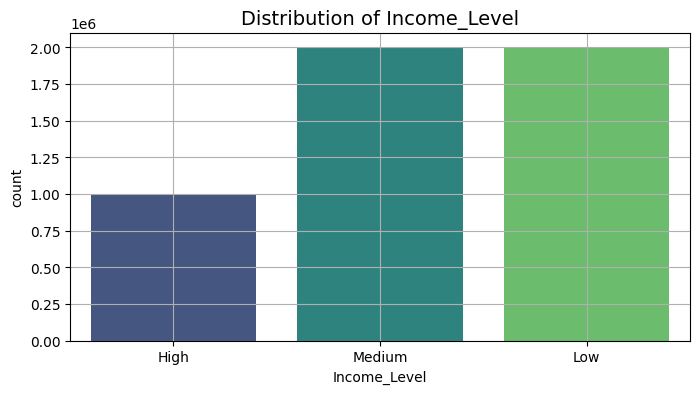

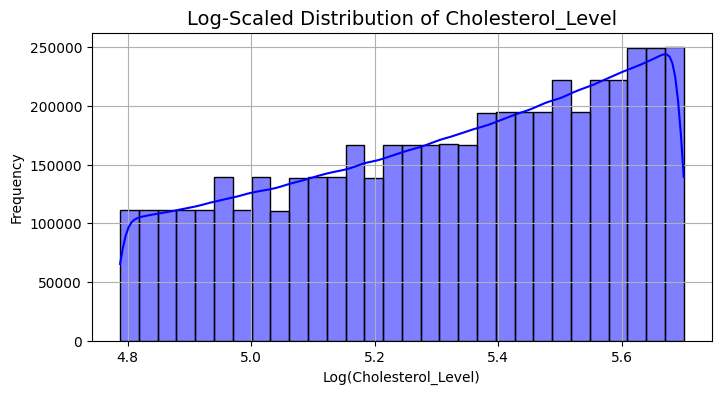

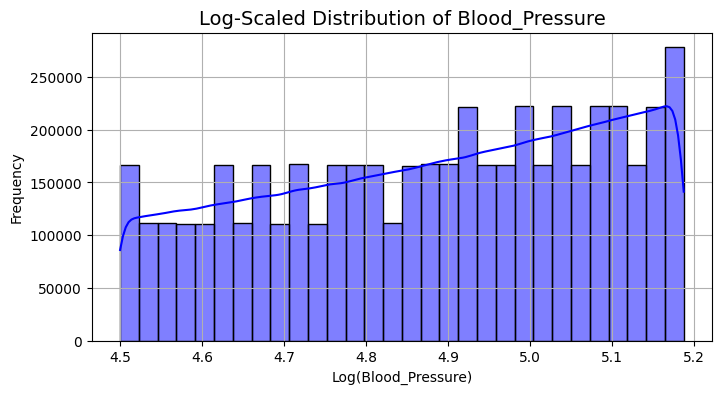

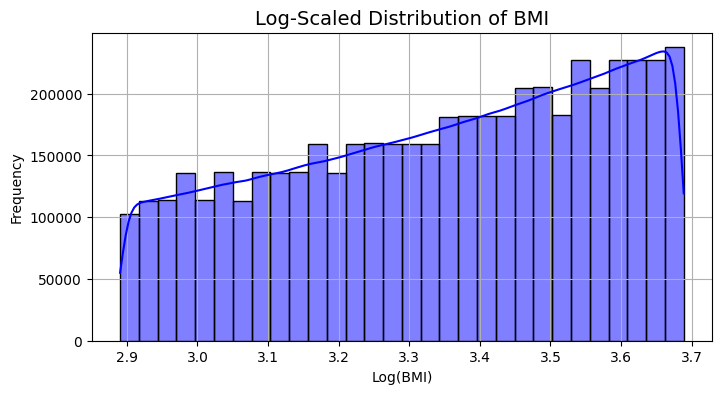

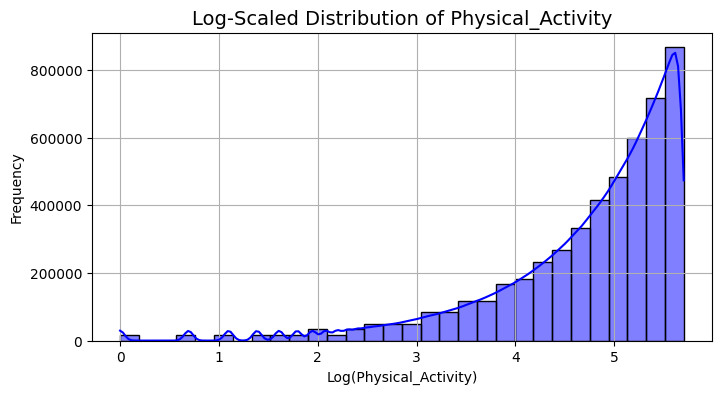

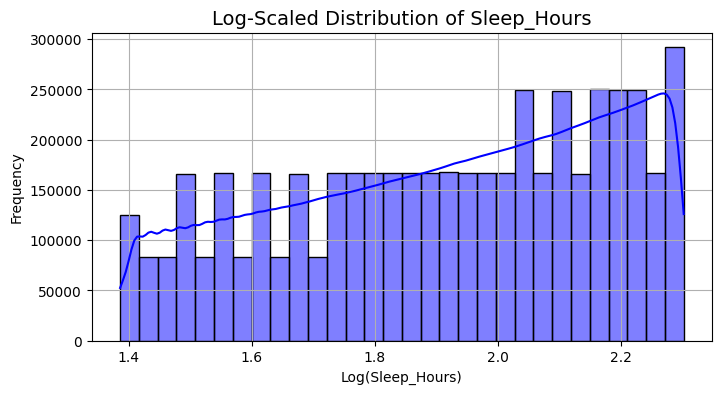

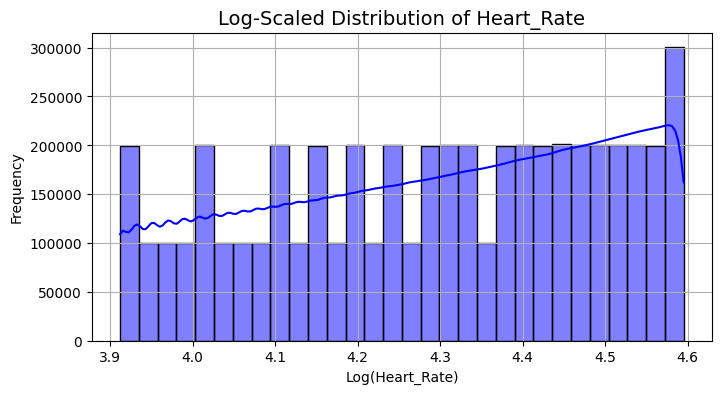

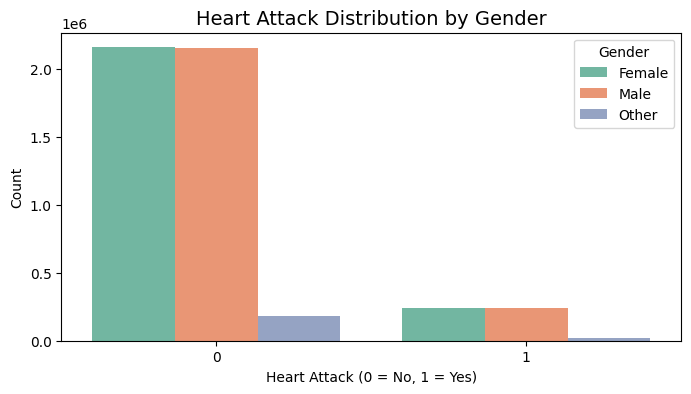

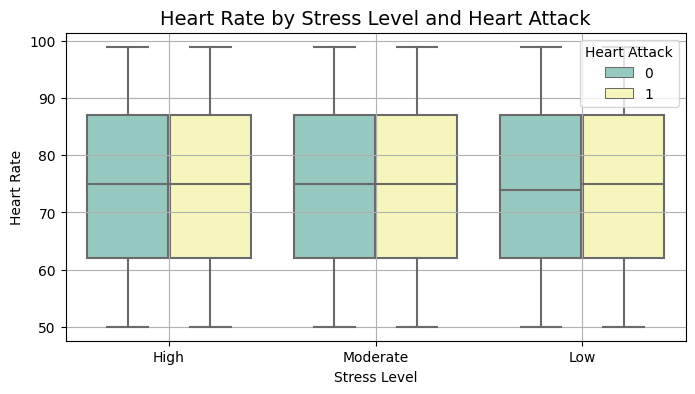

In [11]:
categorical_features = [
    'Age_Group', 'Gender', 'Ethnicity', 'Smoking_Status', 
    'Alcohol_Consumption', 'Diet_Quality', 'Stress_Level', 
    'Air_Quality_Index', 'Income_Level'
]

continuous_features = [
    'Cholesterol_Level', 'Blood_Pressure', 'BMI', 
    'Physical_Activity', 'Sleep_Hours', 'Heart_Rate'
]

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, palette="viridis")
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xticks(rotation=0)
    plt.grid()
    plt.show()

for feature in continuous_features:
    if (df[feature] <= 0).any():
        transformed = np.log1p(df[feature])  
    else:
        transformed = np.log(df[feature])  
    
    plt.figure(figsize=(8, 4))
    sns.histplot(transformed, kde=True, bins=30, color="blue")
    plt.title(f"Log-Scaled Distribution of {feature}", fontsize=14)
    plt.xlabel(f"Log({feature})")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Heart_Attack", hue="Gender", palette="Set2")
plt.title("Heart Attack Distribution by Gender", fontsize=14)
plt.xlabel("Heart Attack (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Stress_Level", y="Heart_Rate", hue="Heart_Attack", palette="Set3")
plt.title("Heart Rate by Stress Level and Heart Attack", fontsize=14)
plt.xlabel("Stress Level")
plt.ylabel("Heart Rate")
plt.legend(title="Heart Attack")
plt.grid()
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Column Correlation Analysis</div>

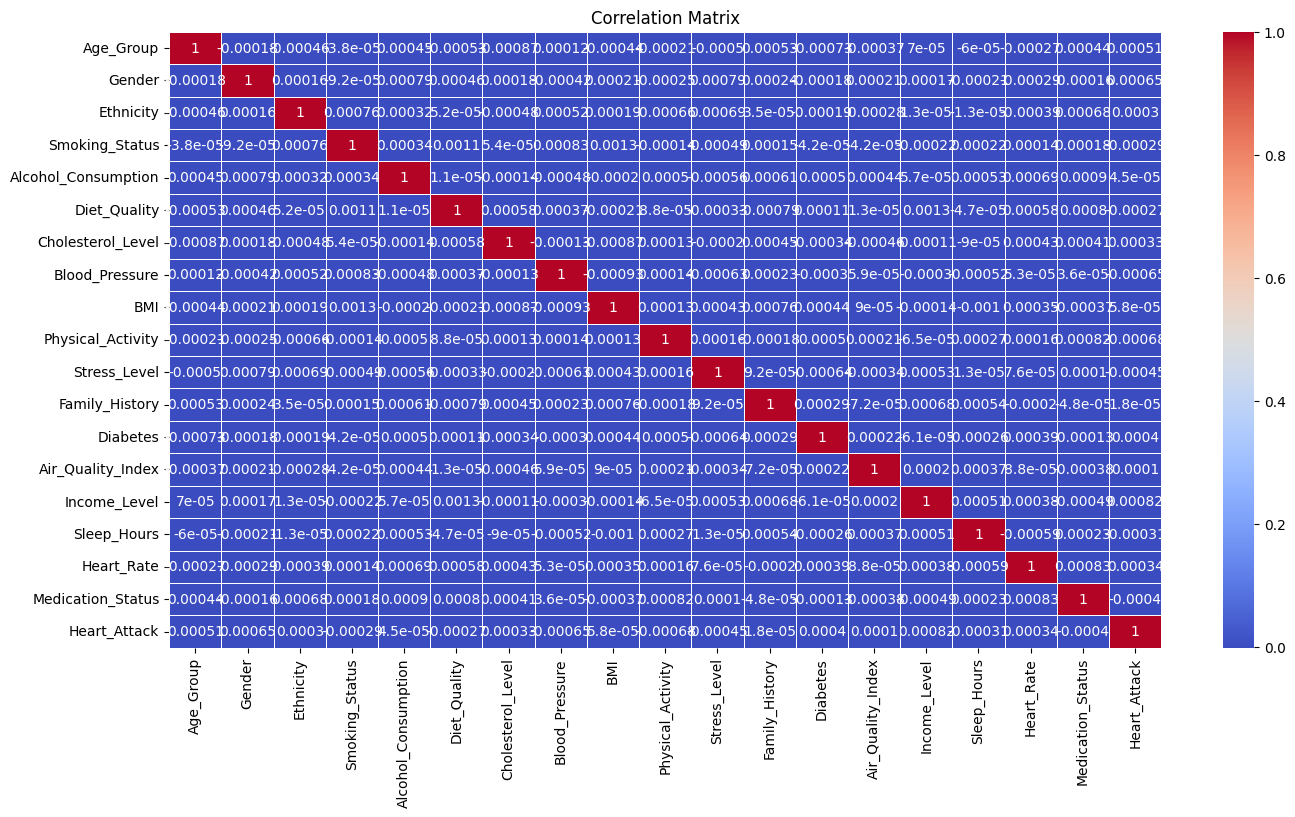

In [12]:
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le  

correlation_matrix = df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of classification model performance</div>

In [13]:
X = df.drop('Heart_Attack', axis=1)
y = df['Heart_Attack']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
 #   "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
 #   "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
#    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
#    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.899673,0.809412,0.899673,0.852159
1,Decision Tree,0.798826,0.819763,0.798826,0.808966
2,XGBoost,0.899673,0.809412,0.899673,0.852159



Best Model:
Model        Logistic Regression
Accuracy                0.899673
Precision               0.809412
Recall                  0.899673
F1-Score                0.852159
Name: 0, dtype: object


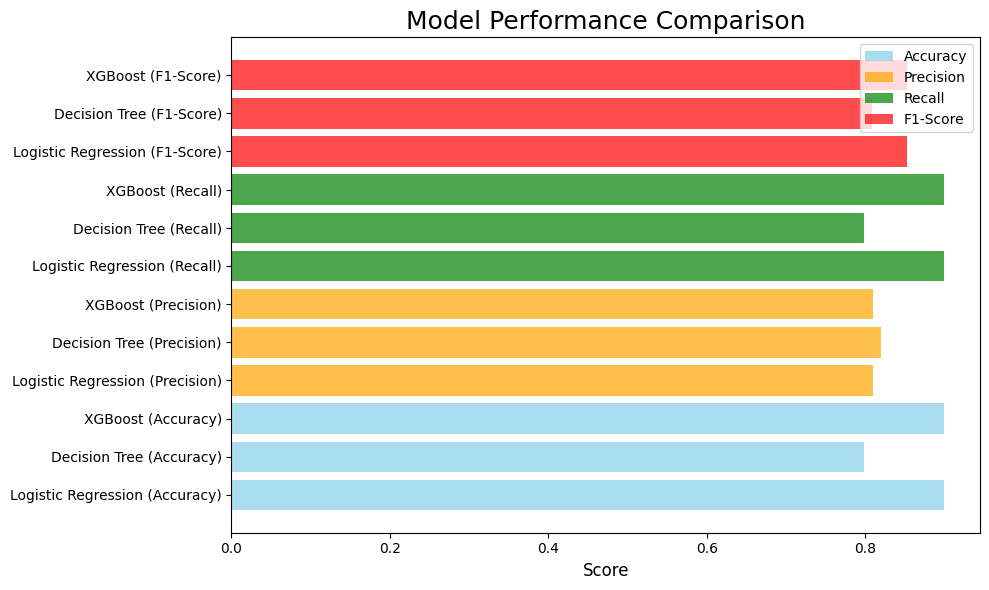


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.8997


In [14]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")